In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.
/Users/nielspace/Documents/MacOS ENVI/aiENVI/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/nielspace/Documents/MacOS ENVI/aiENVI/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/nielspace/Documents/MacOS ENVI/aiENVI/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
train = 'dogs-vs-cats-train-validadion-and-evaluation/train/'
test = 'dogs-vs-cats-train-validadion-and-evaluation/evaluation/'
valid = 'dogs-vs-cats-train-validadion-and-evaluation/validation//'

In [7]:
train_batches = ImageDataGenerator().flow_from_directory(train, target_size=(64,64), classes=['cat','dog'], 
                                                         batch_size=30)
test_batches = ImageDataGenerator().flow_from_directory(test, target_size=(64,64), classes=['cat','dog'], 
                                                         batch_size=30)
valid_batches = ImageDataGenerator().flow_from_directory(valid, target_size=(64,64), classes=['cat','dog'], 
                                                         batch_size=30)

Found 20000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [8]:
img, label = next(train_batches)

In [28]:
def plot(ims, figsize=(16,10), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1]!=3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims) // rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=10)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

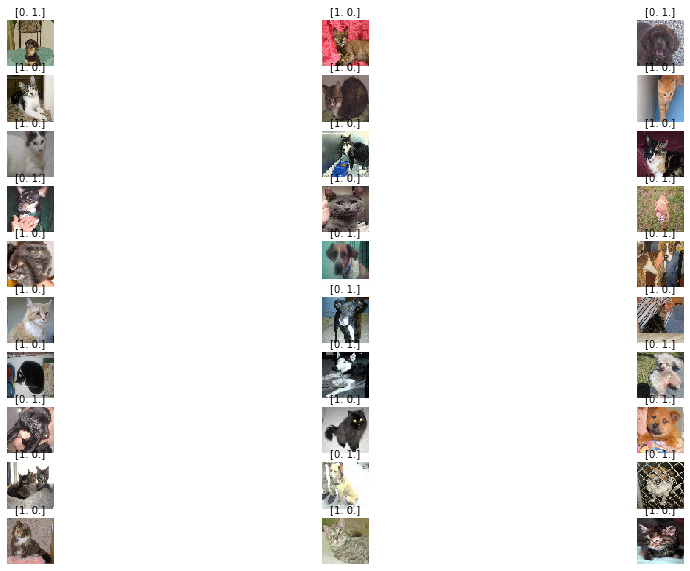

In [29]:
plot(img, titles=label)

In [11]:
#importing layers

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from keras.optimizers import Adam

In [12]:
model=Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape = (64,64,3)),
    Flatten(),
    Dense(2, activation='softmax')
    
])

In [13]:
model.compile(Adam(lr=0.005),loss='categorical_crossentropy',
             metrics=['accuracy'])

In [20]:
history = model.fit_generator(train_batches, steps_per_epoch=2,
                   validation_data=valid_batches, validation_steps=4,
                   epochs=2, verbose=2)

Epoch 1/2
 - 1s - loss: 1.9592 - accuracy: 0.6000 - val_loss: 1.2916 - val_accuracy: 0.4667
Epoch 2/2
 - 1s - loss: 2.5343 - accuracy: 0.5667 - val_loss: 1.2487 - val_accuracy: 0.4167


In [15]:
test_label = label[:,0]

In [16]:
prediction = model.predict_generator(test_batches, steps=1, verbose=0)

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(test_label, prediction[:,0])

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [12]:
model.get_weights()

[array([[[[ 9.59779248e-02, -6.24129176e-02, -8.06858838e-02,
            1.43263802e-01, -4.98335715e-03, -4.57236581e-02,
           -1.27784997e-01,  6.15961924e-02,  9.09080207e-02,
           -1.21966779e-01,  1.36822820e-01, -7.49699846e-02,
           -9.92187299e-03, -1.71975475e-02, -6.72942102e-02,
           -8.10265094e-02, -1.13337979e-01,  6.00385070e-02,
           -1.29156113e-01, -3.96720804e-02, -9.09147114e-02,
            7.53764138e-02, -8.46676454e-02,  5.77428713e-02,
            3.71337868e-02,  1.36093408e-01,  2.04878096e-02,
            3.01613621e-02,  9.02714506e-02, -1.24194942e-01,
            1.32236967e-03,  1.19994007e-01],
          [ 5.54034188e-02, -1.44952722e-02,  1.23953260e-02,
            3.45791131e-03,  1.06276967e-01,  5.35557233e-02,
           -1.41382679e-01, -6.29152507e-02, -1.24341227e-01,
            2.20553502e-02, -1.23028256e-01,  6.47984073e-02,
           -4.33241799e-02, -6.37299009e-03, -1.48469638e-02,
            1.41175196e-

In [13]:
model.save_weights('weights')

In [19]:
model.evaluate_generator(test_batches)

[2.6859285831451416, 0.4650000035762787]

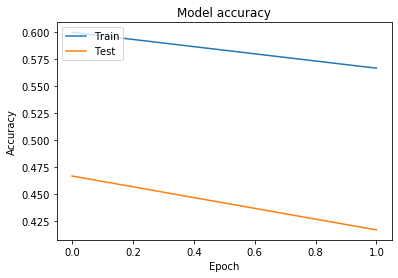

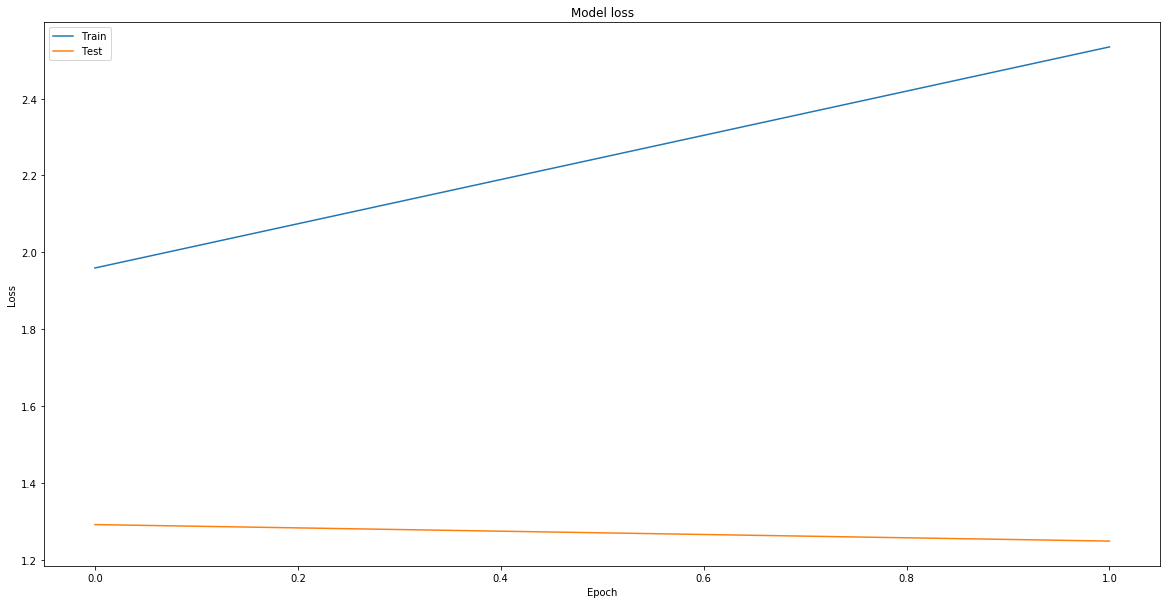

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
history.history

{'val_loss': [1.2916210889816284, 1.2486958503723145],
 'val_accuracy': [0.46666666865348816, 0.4166666567325592],
 'loss': [1.9591715931892395, 2.5343064665794373],
 'accuracy': [0.6, 0.56666666]}

In [25]:
history.epoch

[0, 1]

In [31]:
9000/100

90.0